In [1]:
import os
import sys
from pathlib import Path
import warnings
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import yaml
import importlib
import numpy as np
import gvar as gv
import platform
import pprint
cwd = Path(os.getcwd())
# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)
# If your notebook is in a subdirectory of the project root, you can modify the path accordingly:
# project_root = cwd.parent  # Go up one directory level
# project_root = cwd.parent.parent  # Go up two directory levels
# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

# local imports 
import xpt.fit_analysis as xfa
import xpt.priors as priors
import xpt.i_o as i_o
import xpt.fit_routine as fit
import xpt.plots as plots
warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')

# Define paths and other variables
if platform.system() == 'Darwin':
    base_dir = '/Users/grantdb/lqcd'
else:
    base_dir = '/home/gmoney/lqcd'

data_dir = os.path.join(base_dir, "data")
hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")


/home/gmoney/lqcd/hyperon-xpt-master


In [2]:
from importlib import reload
reload(xfa)
reload(i_o)
reload(fit)
reload(priors)

<module 'xpt.priors' from '/home/gmoney/lqcd/hyperon-xpt-master/xpt/priors.py'>

In [3]:
gv.load('../scale_setting.p')
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
lam_sigma_models = models['models']['lam_sigma_system']

### perform hbxpt mass extrapolations using physical mass of hyperons in mev with scale setting parameterization ###

In [4]:

prior = priors.get_prior(units='mev')
input_output = i_o.InputOutput(project_path=data_dir)
data, ensembles = input_output.get_data(units='phys')
new_prior = input_output.make_prior(data=data,prior=prior)
phys_point_data = input_output.get_data_phys_point()

In [5]:
reload(xfa)
reload(fit)
model_info=xi_models['xi:xi_st:d_n2lo:l_n2lo:x_n2lo:phys']
xi_fit = fit.FitRoutine(prior=prior,data=data, project_path=data_dir,model_info=model_info,
                    phys_point_data=phys_point_data, emp_bayes=None,empbayes_grouping=None)
print(xi_fit)
print(xi_fit.extrapolation(observables=['sigma_pi','mass'],data=phys_point_data))
extrap_analysis = xfa.Xpt_Fit_Analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=model_info, prior=new_prior,project_path=data_dir)
# y_fit_ = extrap_analysis.extrapolation()
# print(y_fit_)

# extrap_analysis.plot_params(xparam='mpi_sq',yparam='xi')
extrap_analysis.plot_params(xparam='eps2_a',observable='xi',show_plot=True,eps=False)

extrap_analysis.plot_params_fit(param='a',observable='xi',eps=False)
# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')



Least Square Fit:
  chi2/dof [dof] = 0.41 [34]    Q = 1    logGBF = -148.69

Parameters:
       m_{xi,0}       1327 (21)      [    1000 (400) ]  
         s_{xi}       1.22 (53)      [     0.0 (2.0) ]  
       b_{xi,4}       0.1 (1.9)      [     0.0 (2.0) ]  
       d_{xi,a}      -0.67 (19)      [    -2.0 (2.0) ]  
      d_{xi,aa}       1.81 (69)      [     2.0 (4.0) ]  
      d_{xi,al}      -3.4 (1.2)      [     0.0 (5.0) ]  
      g_{xi,xi}   0.009 (3.976)      [     0.3 (4.0) ]  
   g_{xi_st,xi}       0.1 (2.4)      [     0.7 (3.0) ]  
    m_{xi_st,0}       1529 (29)      [    1300 (400) ]  
       a_{xi,4}      -0.8 (1.7)      [     0.0 (2.0) ]  
     s_{xi,bar}       1.57 (63)      [     0.0 (2.0) ]  
    b_{xi_st,4}       0.7 (4.2)      [     0.0 (5.0) ]  
    d_{xi_st,a}      -0.08 (23)      [     0.0 (2.0) ]  
   d_{xi_st,aa}       0.12 (81)      [     0.0 (5.0) ]  
   d_{xi_st,al}      -4.0 (1.3)      [     0.0 (5.0) ]  
g_{xi_st,xi_st}      -0.4 (1.4)      [    -0.8 (2.0) ]  

AttributeError: 'Xpt_Fit_Analysis' object has no attribute 'extrapolation'

{'xi': array([1347(18), 1343(17), 1339(16), 1335(15), 1331(15), 1327(14),
       1324(13), 1320(12), 1317(11), 1313(11), 1310(10), 1307.0(9.6),
       1303.9(9.1), 1300.9(8.6), 1297.9(8.2), 1295.1(7.8), 1292.4(7.4),
       1289.7(7.1), 1287.2(6.9), 1284.7(6.6), 1282.3(6.4), 1280.0(6.3),
       1277.8(6.1), 1275.7(6.0), 1273.7(5.9), 1271.8(5.8), 1269.9(5.7),
       1268.2(5.7), 1266.5(5.6), 1264.9(5.6), 1263.5(5.5), 1262.1(5.5),
       1260.8(5.5), 1259.5(5.4), 1258.4(5.4), 1257.4(5.4), 1256.4(5.4),
       1255.6(5.4), 1254.8(5.4), 1254.1(5.5), 1253.6(5.6), 1253.1(5.7),
       1252.7(5.8), 1252.3(6.0), 1252.1(6.3), 1252.0(6.6), 1251.9(6.9),
       1252.0(7.3), 1252.1(7.8), 1252.3(8.3)], dtype=object), 'xi_st': array([1553(25), 1552(24), 1552(23), 1551(21), 1550(20), 1549(19),
       1548(18), 1547(17), 1547(16), 1546(15), 1545(14), 1544(13),
       1543(13), 1542(12), 1542(11), 1541(11), 1540(10), 1539.4(9.8),
       1538.6(9.3), 1537.9(9.0), 1537.1(8.7), 1536.4(8.4), 1535.6(8.2),
     

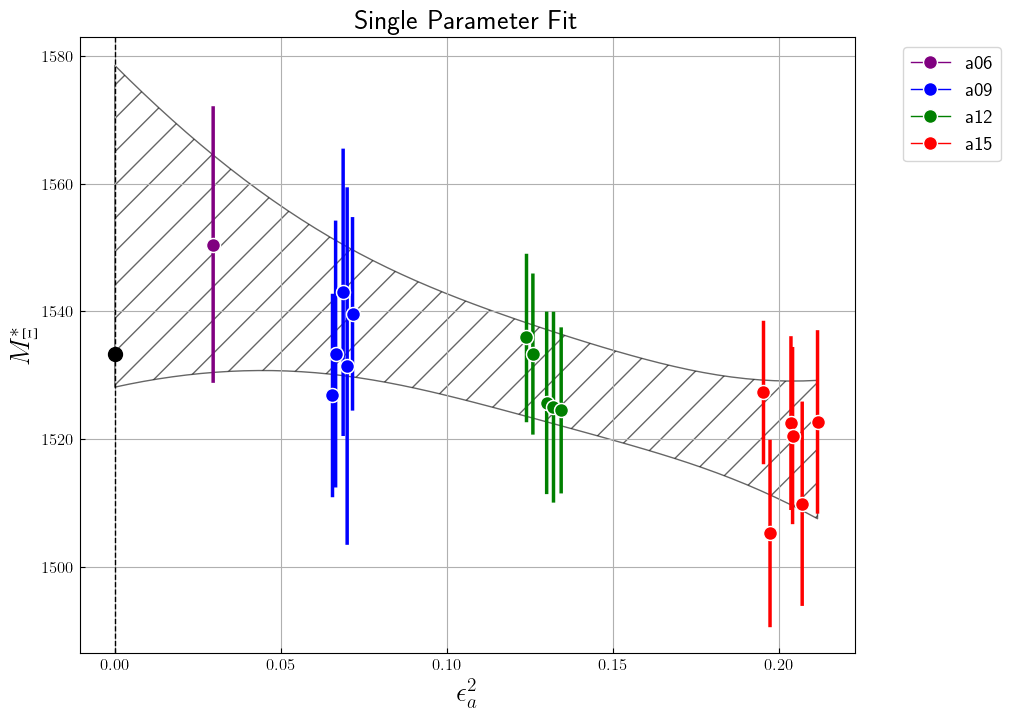

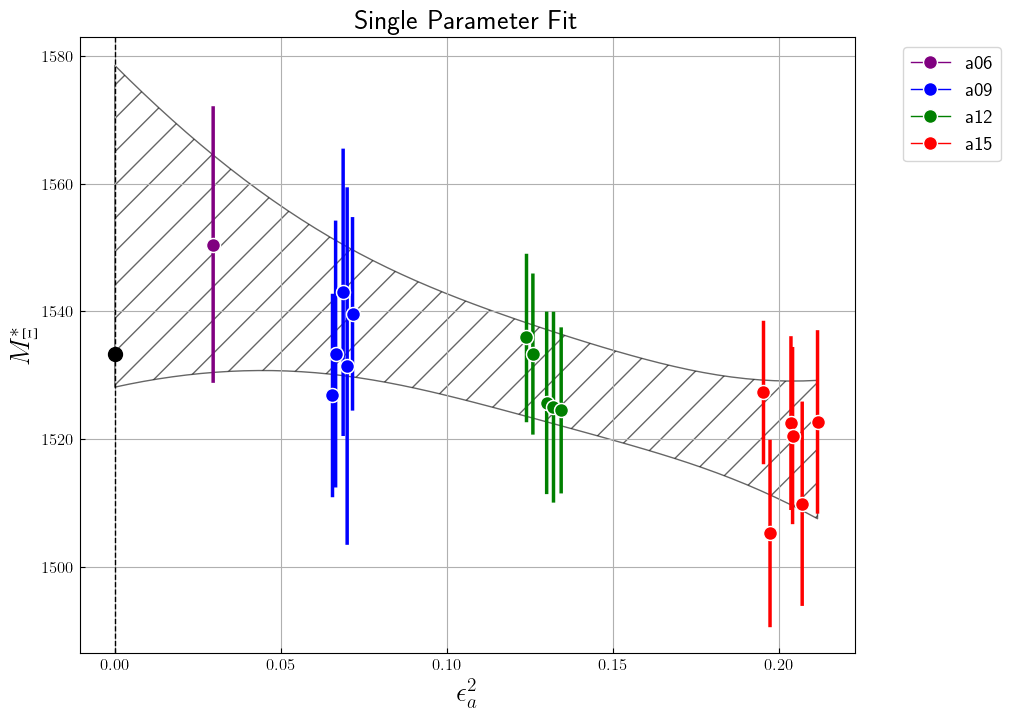

In [ ]:
extrap_analysis.plot_params_fit(param='a',observable='xi_st')


Error encountered for Model: xi:xi_st:d_n2lo:l_lo
Error details: 'units'
Error encountered for Model: xi:xi_st:d_n2lo:l_n2lo
Error details: 'units'


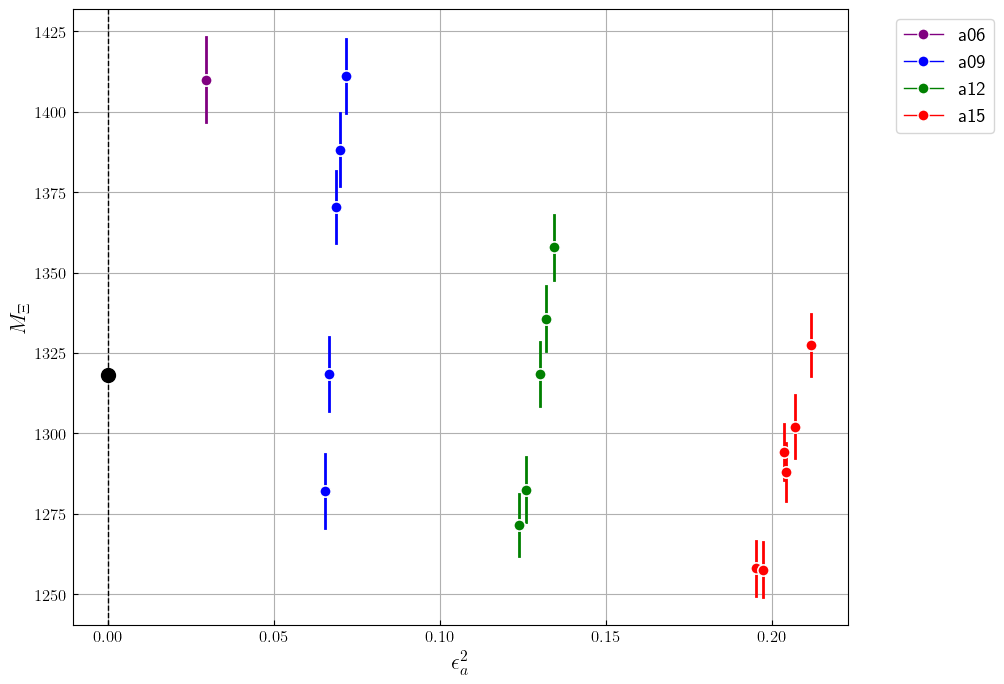

Model: xi:xi_st:d_n2lo:l_n2lo:x_n2lo


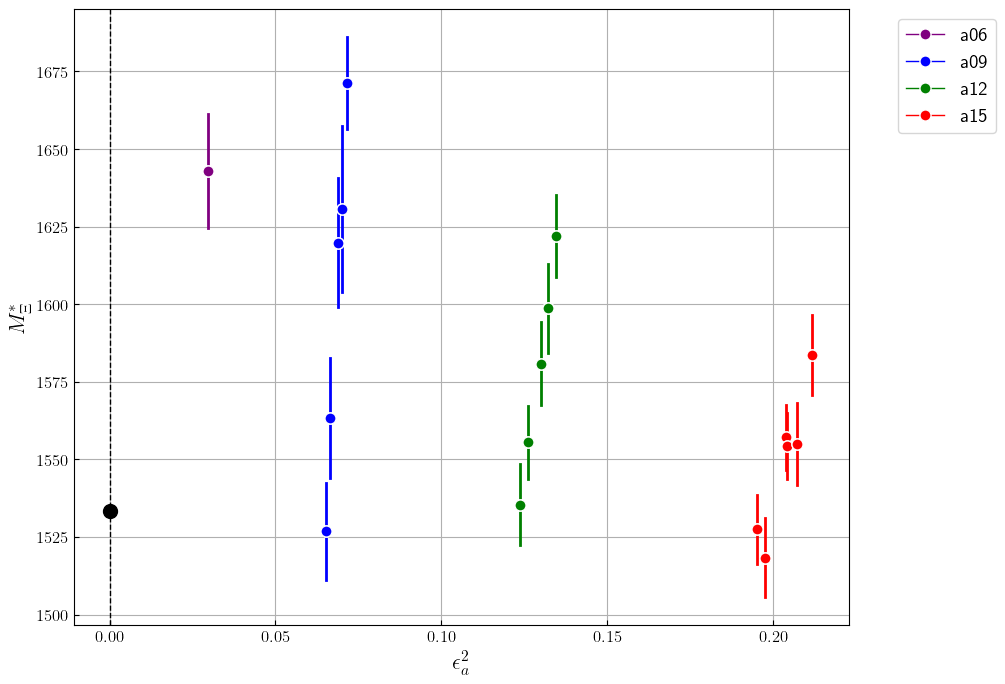

Model: xi:xi_st:d_n2lo:l_n2lo:x_n2lo


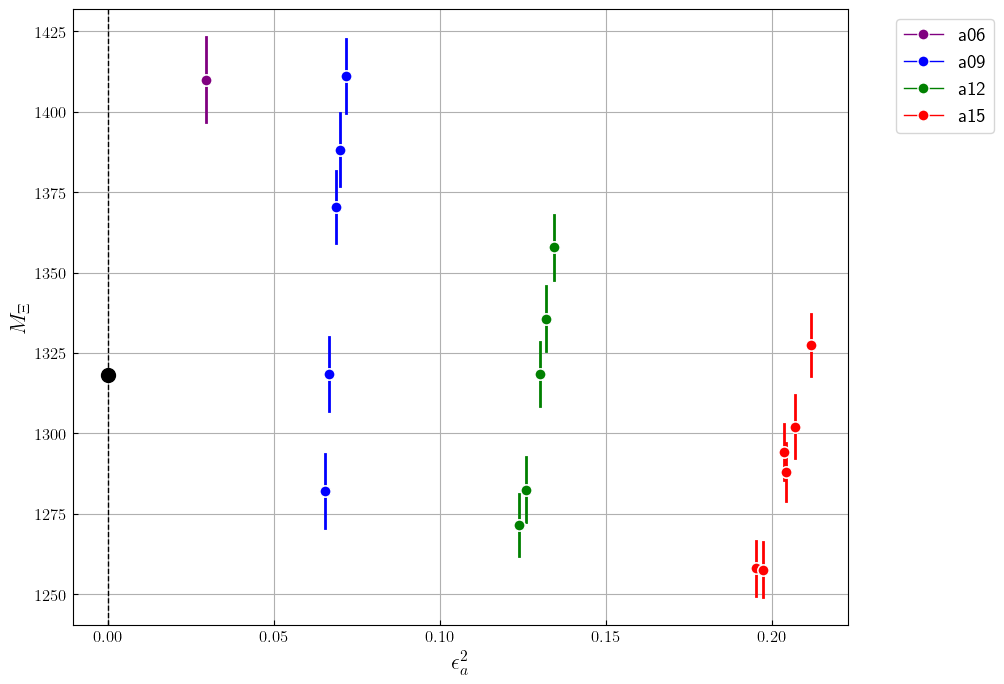

Model: xi:xi_st:d_n2lo:l_n2lo:x_n2lo:phys


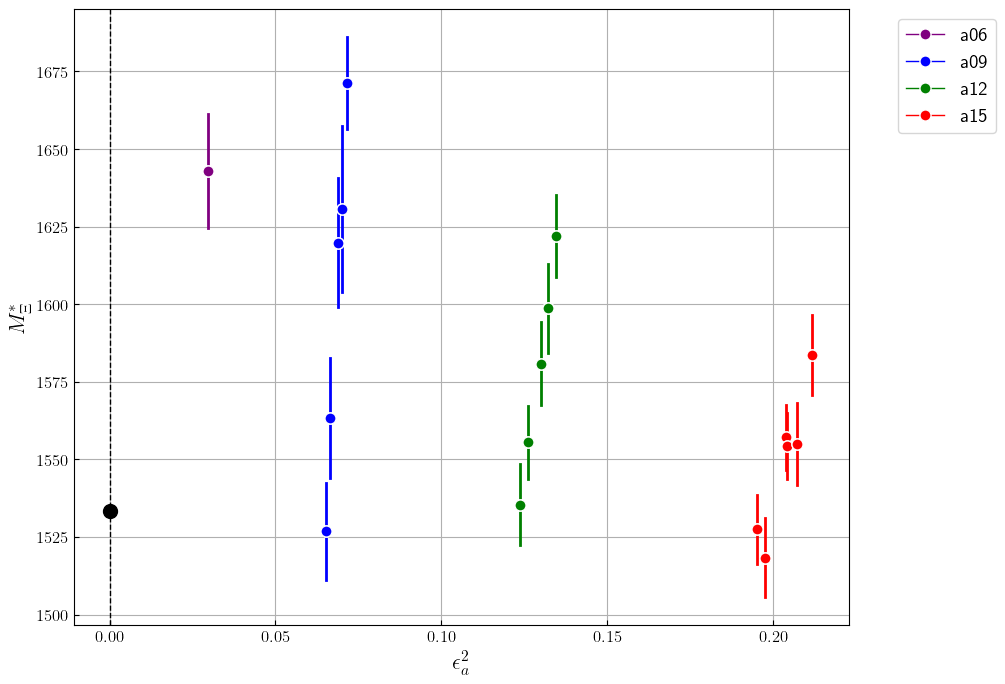

Model: xi:xi_st:d_n2lo:l_n2lo:x_n2lo:phys
Error encountered for Model: xi:xi_st:d_n2lo:l_nlo:x_n2lo
Error details: 'units'
Error encountered for Model: xi:xi_st:d_n2lo:l_lo:s_lo
Error details: 'units'
Error encountered for Model: xi:xi_st:d_n2lo:l_nlo:s_lo:x_n2lo
Error details: 'units'
Error encountered for Model: xi:xi_st:d_n2lo:l_n2lo:s_lo:x_n2lo
Error details: 'units'


In [ ]:

importlib.reload(xfa)
importlib.reload(fit)
importlib.reload(i_o)

def perform_fit_and_plot(model_type,mdl_key):
    mdl_info = model_type[mdl_key]
    extrap_analysis = xfa.Xpt_Fit_Analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior,project_path=data_dir)
    fit_out = extrap_analysis.fit
    for part in mdl_info['particles']:
        extrap_analysis.plot_params(observable=part,xparam='eps2_a',show_plot=True)
        print(f"Model: {mdl_key}")
        # print(fit_out)

    # print(extrap_analysis)

        # return fit_out

with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
for mdl_key in xi_models:
    # mdl_info = xi_models[mdl_key]
    try:
        perform_fit_and_plot(xi_models,mdl_key)
    except Exception as e:
        print(f"Error encountered for Model: {mdl_key}")
        print(f"Error details: {e}")
        continue
    


## Xi, Xi* system SU(2) HBXPT extrapolation ##


In [ ]:
from scipy.interpolate import interp1d
importlib.reload(xfa)

def perform_fit_and_plot(model_type,mdl_key):
    mdl_info = model_type[mdl_key]
    extrap_analysis = xfa.fit_analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior)
    fit_out = extrap_analysis.fit
    print(fit_out)
    print(f"Model: {mdl_key}")
    print(extrap_analysis)

    # x_data = [gv.mean(x) for x in extrap_analysis.fit.p['eps2_a']]
    # for part in mdl_info['particles']:
    #     y_data = [gv.mean(y) for y in extrap_analysis.fit.y[part]]

    # y_fit = interp1d(x_data, y_data, kind='cubic', fill_value='extrapolate')

    # x_fit = np.linspace(-0.1, 0.1, 100)
    # y_fit_vals = [y_fit(x) for x in x_fit]

    # plt.plot(x_fit, y_fit_vals, label=f"{mdl_key}")
    # plt.fill_between(x_fit, [y - gv.sdev(y) for y in y_fit_vals], [y + gv.sdev(y) for y in y_fit_vals], alpha=0.5)

    # plt.axvline(0, ls='--', color='black', label='phys. point')
    # y_phys = np.mean([gv.gvar(g) for g in ['1314.86(20)', '1321.71(07)']])
    
    # plt.plot(0, gv.mean(y_phys), marker='o', mec='w', zorder=0.2, color='black')

    # plt.xlabel("$\epsilon_a^2$")
    # plt.ylabel("$m_\Xi(MeV)$")
    # plt.legend()
    # plt.grid()
    # plt.show()
    return fit_out


In [ ]:
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
lam_sig_models = models['models']['lam_sigma_system']
for mdl_key in lam_sig_models:
    try:
        perform_fit_and_plot(lam_sig_models,mdl_key)
    except Exception as e:
        print(f"Error encountered for Model: {mdl_key}")
        print(f"Error details: {e}")
        continue
    

Error encountered for Model: lam:sigma:sigma_st:l_lo:d_n2lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Model: lam:sigma:sigma_st:l_n2lo:d_n2lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Model: lam:sigma:sigma_st:l_n2lo:d_n2lo:x_n2lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Model: lam:sigma:sigma_st:l_nlo:d_n2lo:x_n2lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Model: lam:sigma:sigma_st:l_lo:d_n2lo:s_lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Model: lam:sigma:sigma_st:l_n2lo:d_n2lo:s_lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Model: lam:sigma:sigma_st:l_nlo:s_lo:d_n2lo:x_n2lo
Error details: module 'xpt.fit_analysis' has no attribute 'fit_analysis'
Error encountered for Mod

In [ ]:
lam_sig_models = models['models']['lam_sigma_system']
model_info = lam_sig_models['lam:sigma:sigma_st:l_lo:d_n2lo:s_lo']
my_fit = fit.FitRoutine(phys_point_data=phys_point_data,emp_bayes=None,empbayes_grouping=None,
                                data=data,model_info=model_info,prior=new_prior)
lam_sigma_sys_out = my_fit.fit
plot_params(fit=lam_sigma_sys_out,yparam='lambda')

TypeError: FitRoutine.__init__() missing 1 required positional argument: 'project_path'

In [ ]:
lam_sigma_fit = perform_fit_and_plot(model_type=mod)
plot_params()

NameError: name 'mod' is not defined

### Lambda, Sigma, Sigma_star SU(2) hbxpt extrapolation

In [ ]:
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
lam_sig_models = models['models']['lam_sigma_system']
for mdl_key in lam_sig_models:
    perform_fit_and_plot(lam_sig_models,mdl_key)

Model: lam:sigma:sigma_st:l_n2lo:s_n2lo:d_n2lo:x_n2lo

---
Least Square Fit:
  chi2/dof [dof] = 0.99 [51]    Q = 0.49    logGBF = -247.67

Parameters:
         m_{lambda,0}         1039.01 +- 26.9751            [               1000 +- 50 ]  
           s_{lambda}          2.1043 +- 1.00877            [                   0 +- 5 ]  
         b_{lambda,4}        0.882997 +- 4.37478            [                   0 +- 5 ]  
         d_{lambda,a}      0.0539212 +- 0.312282            [                   0 +- 5 ]  
        d_{lambda,aa}       -0.149455 +- 1.18896            [                   0 +- 5 ]  
        d_{lambda,al}        -3.55825 +- 3.39301            [                   0 +- 5 ]  
         d_{lambda,s}       -1.02076 +- 0.783243            [                   0 +- 5 ]  
        d_{lambda,as}         4.15861 +- 3.30558            [                   0 +- 5 ]  
        d_{lambda,ls}          2.4444 +- 4.66278            [                   0 +- 5 ]  
        d_{lambda,ss}        -

KeyError: 'undefined key: a_{sigma,4}'